# Assignment 1: Image Filtering
Author: Theodore Janson - 260868223 <br>
Course: ECSE 415 <br>
Date: October 5th, 2020

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/ECSE 415/Assignment1/'


Mounted at /content/drive


##1  Thresholding
### 1.1 & 1.3 Simple, Binary and inverse Thresholding                                                                                                 

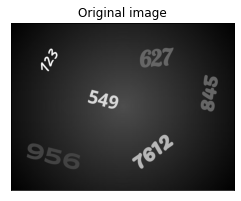

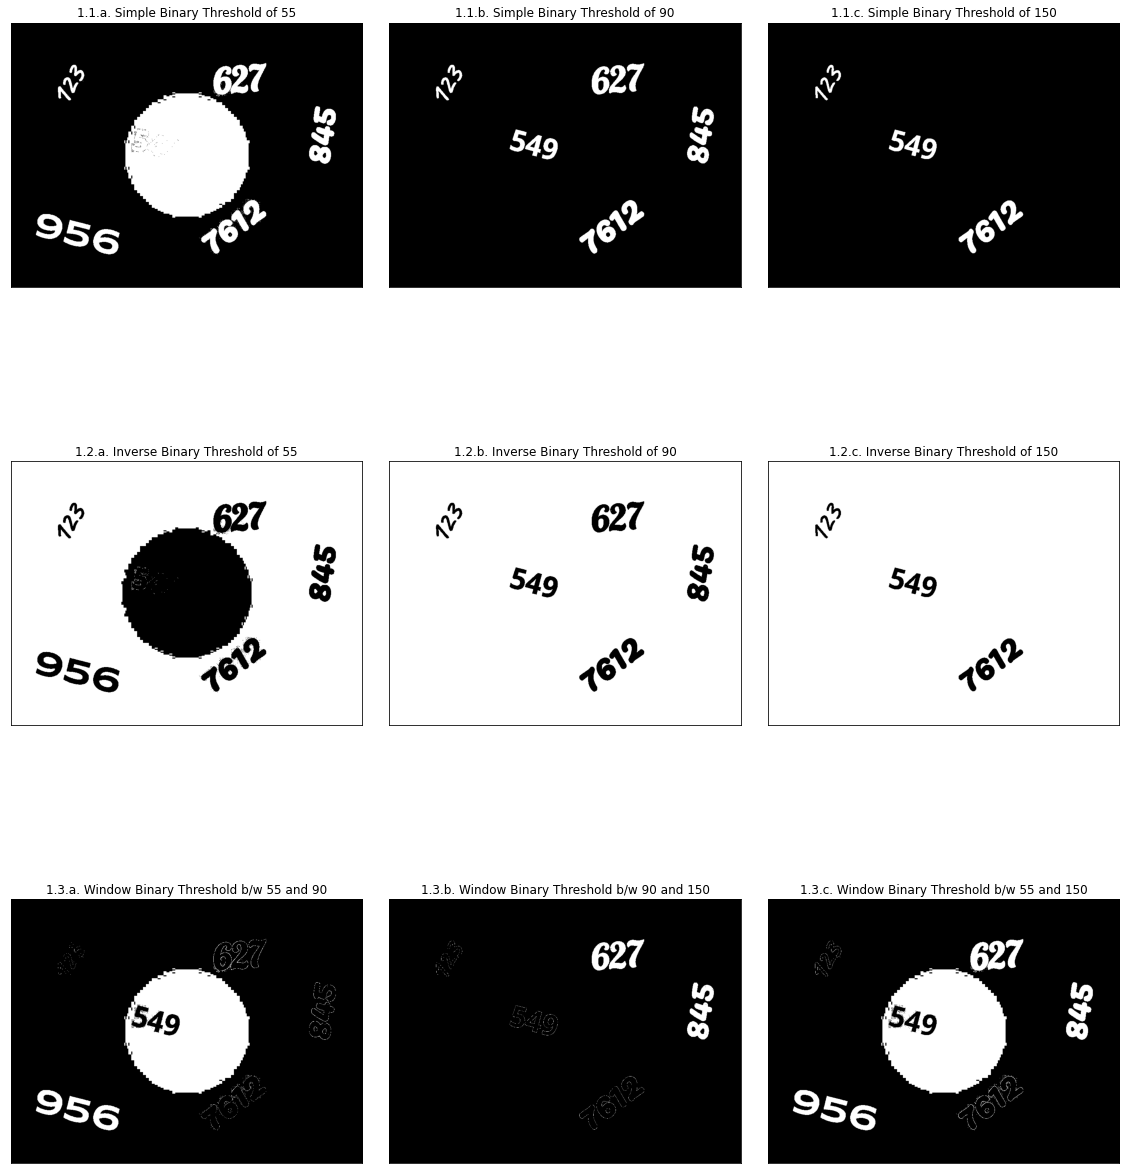

In [ ]:
#loading image
numbers_img = mpimg.imread(path + 'numbers.jpg')

#Threshold constants
THRESH1, THRESH2, THRESH3 = 55, 90, 150

#Simple Binary Thresholding
#Initializing new images to all black
sthresh_img1 = np.zeros_like(numbers_img)
sthresh_img2 = np.zeros_like(numbers_img)
sthresh_img3 = np.zeros_like(numbers_img)

#If brightness of pixel on image is above threshold, make it white. 
sthresh_img1[numbers_img > THRESH1] = 255
sthresh_img2[numbers_img > THRESH2] = 255
sthresh_img3[numbers_img > THRESH3] = 255

#Inverse Binary Thresholding
#Initializing new images to all black
ithresh_img1 = np.zeros_like(numbers_img)
ithresh_img2 = np.zeros_like(numbers_img)
ithresh_img3 = np.zeros_like(numbers_img)

#If brightness on image is below threshold, make it white
#Output should be inverse of simple thresholding
ithresh_img1[numbers_img < THRESH1] = 255
ithresh_img2[numbers_img < THRESH2] = 255
ithresh_img3[numbers_img < THRESH3] = 255

#Window Binary Thresholding
#Initializing new images to all black
wthresh_img1 = np.zeros_like(numbers_img)
wthresh_img2 = np.zeros_like(numbers_img)
wthresh_img3 = np.zeros_like(numbers_img)

#Window threshold is the difference between the low threshold and high
#thresholds
wthresh_img1 = sthresh_img1 - sthresh_img2
wthresh_img2 = sthresh_img2 - sthresh_img3
wthresh_img3 = sthresh_img1 - sthresh_img3


#Plotting figures
fig = plt.figure(figsize = (4,5))
plt.subplot(111), plt.imshow(numbers_img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize= (16,20))
plt.subplot(331), plt.imshow(sthresh_img1, cmap='gray')
plt.title('1.1.a. Simple Binary Threshold of 55'), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(sthresh_img2, cmap='gray')
plt.title('1.1.b. Simple Binary Threshold of 90'), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(sthresh_img3, cmap='gray')
plt.title('1.1.c. Simple Binary Threshold of 150'), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(ithresh_img1, cmap='gray')
plt.title('1.2.a. Inverse Binary Threshold of 55'), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(ithresh_img2, cmap='gray')
plt.title('1.2.b. Inverse Binary Threshold of 90'), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(ithresh_img3, cmap='gray')
plt.title('1.2.c. Inverse Binary Threshold of 150'), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(wthresh_img1, cmap='gray')
plt.title('1.3.a. Window Binary Threshold b/w 55 and 90'), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(wthresh_img2, cmap='gray')
plt.title('1.3.b. Window Binary Threshold b/w 90 and 150'), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(wthresh_img3, cmap='gray')
plt.title('1.3.c. Window Binary Threshold b/w 55 and 150'), plt.xticks([]), plt.yticks([])
fig = plt.tight_layout(h_pad=0, w_pad=0.1)
plt.show()




### 1.2 Observations
In simple and inverse thresholding, naturally more pixels are cut off by the threshold as it increases. 
For a threshold of 55, all 6 numbers are segmented, but 549 is eclipsed by the light gradient at the center which was segmented. 

For a threshold of 90, 549 is revieled. However, 956 does not pass the threshold, so five numbers, 123, 549, 627, 845, 7612. 

At 150, three numbers, 123, 549, 7612 are segmented. 

### 1.4 Observations

The differences between thresholds can me analyzed more precisely with a window threshold. 

1.3.a clearly shows features that are present in threshold of 55, but were absent in the threshold of 90: 956, 549, the white cirle and the outlines of 7612, 627 and 845, so the only number segmented is 956, as well as the white gradient.  

Likewise, in 1.3.b, we confirm that two numbers, 845 and 627, are segmented between the 90 and 150 thresholds. 

Finally, in 1.3.c, we confirm that three numbers are segmented between the 55 and 150 thresholds: 956, 627 and 845, as well as outlines of other numbers and the white gradient. 

549 is not considered segmented as its technically part of the background. 

#2  Denoising

Peak Signal to Noise Ratio between clean image and Gaussian filtering: 73.66668444989523
Peak Signal to Noise Ratio between clean image and Box filtering: 73.02132033581012


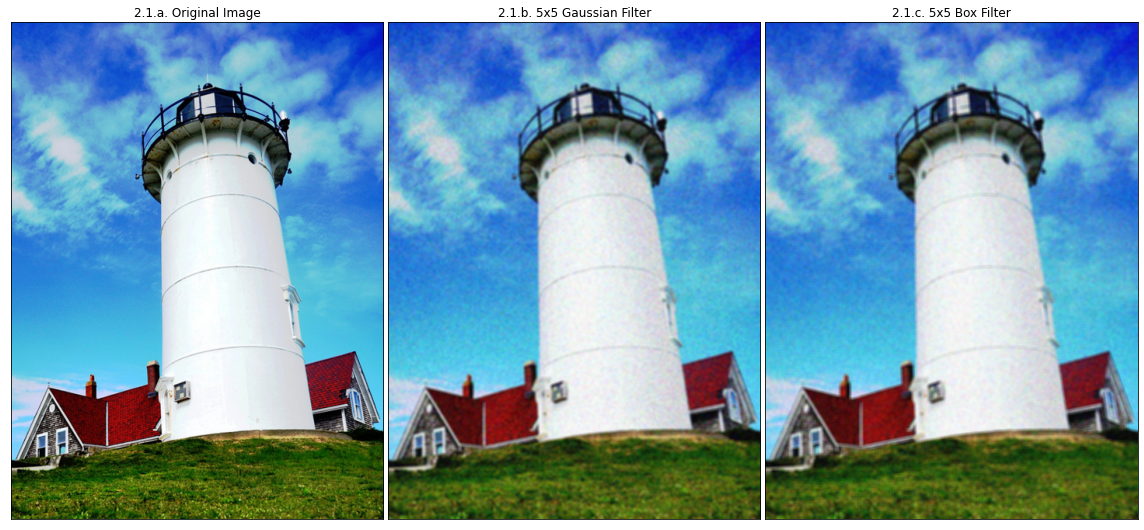

In [ ]:
import cv2

clean_img = plt.imread(path+'lighthouse.png')
g_noisy_img = plt.imread(path+'gaussian_lighthouse.png')

def get_dtype(img):
  """
  Gets the cv2 data type for a corresponding np.array datatype
  Parameters
  ----------
  img : np.array
  Returns
  -------
  cv2 data type
  """
  dtype = img.dtype
  if (dtype == np.dtype(np.uint8)):
    return cv2.CV_8U
  elif (dtype == np.dtype(np.float32)):
    return cv2.CV_32F
  elif (dtype == np.dtype(np.float64)):
    return cv2.CV_64F

#Denoising image 5x5 Gaussian filter with a variance of 2
g_noisy_img2 = g_noisy_img.copy()
g_noisy_img = cv2.GaussianBlur(g_noisy_img, (5,5), 2)
#Filter noisy image with box filter
box_kernel = np.ones((5,5)) / 25
#Convolving noisy image with box kernel
g_noisy_img2 = cv2.filter2D(g_noisy_img2, get_dtype(g_noisy_img2), box_kernel)

#Comparing the PSNR of the denoised and clean image
psnr1 = cv2.PSNR(clean_img, g_noisy_img)
print('Peak Signal to Noise Ratio between clean image and Gaussian filtering: {}' .format(psnr1))
psnr2 = cv2.PSNR(clean_img, g_noisy_img2)
print('Peak Signal to Noise Ratio between clean image and Box filtering: {}' .format(psnr2))

fig = plt.figure(figsize= (16,20))
plt.subplot(131), plt.imshow(clean_img, cmap='gray')
plt.title('2.1.a. Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(g_noisy_img, cmap='gray')
plt.title('2.1.b. 5x5 Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(g_noisy_img2, cmap='gray')
plt.title('2.1.c. 5x5 Box Filter'), plt.xticks([]), plt.yticks([])
fig = plt.tight_layout(h_pad=0, w_pad=0.1)
plt.show()



###2.3 Observations
As shown above, the PSNR of the Gaussian filter is slightly greater, making it quantitively the better filter. Qualitively, the image after Gaussian filtering looks slightly less noisy and its edges also look sharper. 

Peak Signal to Noise Ratio between clean image and Gaussian filtering: 72.9143684314677
Peak Signal to Noise Ratio between clean image and median filtering: 74.97441581361174


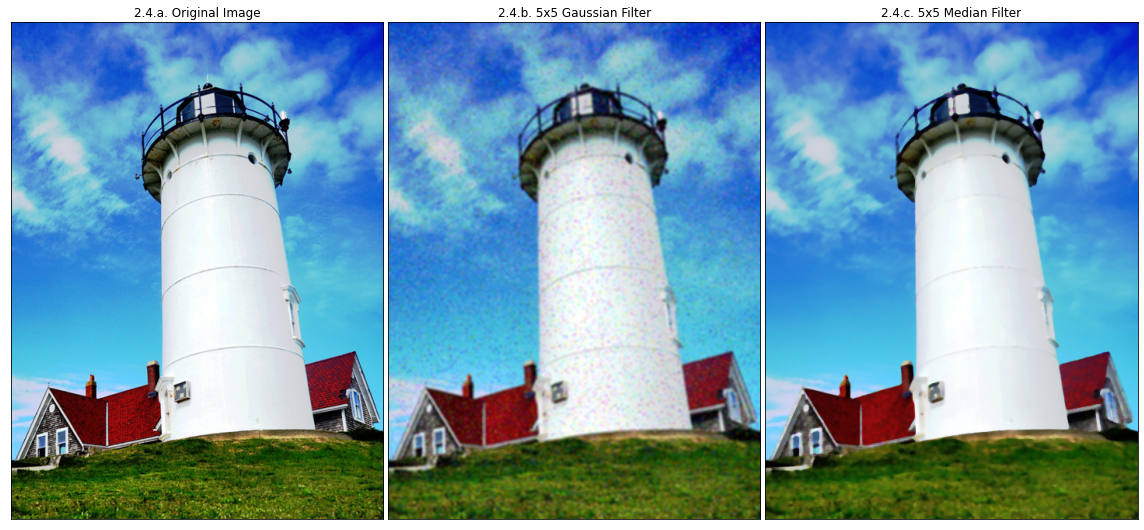

In [ ]:

#Loading image with salt and pepper noise 
sp_noisy_img = plt.imread(path+'saltandpepper_lighthouse.png')
sp_noisy_img2 = sp_noisy_img.copy()

#Denoising image 5x5 Gaussian filter with a variance of 2
sp_noisy_img = cv2.GaussianBlur(sp_noisy_img, (5,5), 2)
#Denoising with median filter
sp_noisy_img2 = cv2.medianBlur(sp_noisy_img2, 5) 

#Comparing the PSNR of the denoised and clean image
psnr3 = cv2.PSNR(clean_img, sp_noisy_img)
psnr4 = cv2.PSNR(clean_img, sp_noisy_img2)
print('Peak Signal to Noise Ratio between clean image and Gaussian filtering: {}' .format(psnr3))
print('Peak Signal to Noise Ratio between clean image and median filtering: {}' .format(psnr4))


fig = plt.figure(figsize= (16,20))
plt.subplot(131), plt.imshow(clean_img, cmap='gray')
plt.title('2.4.a. Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sp_noisy_img, cmap='gray')
plt.title('2.4.b. 5x5 Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sp_noisy_img2, cmap='gray')
plt.title('2.4.c. 5x5 Median Filter'), plt.xticks([]), plt.yticks([])
fig = plt.tight_layout(h_pad=0, w_pad=0.1)
plt.show()





###2.6 Observations
As shown above, the PSNR of the Median filter is greater, making it quantitively the better filter. Qualitively, the image after Median filtering looks sharper, and is not corrupted with salt and pepper noise, as is the lighthouse with Gaussian filtering. 

#3 Sobel Edge Detector

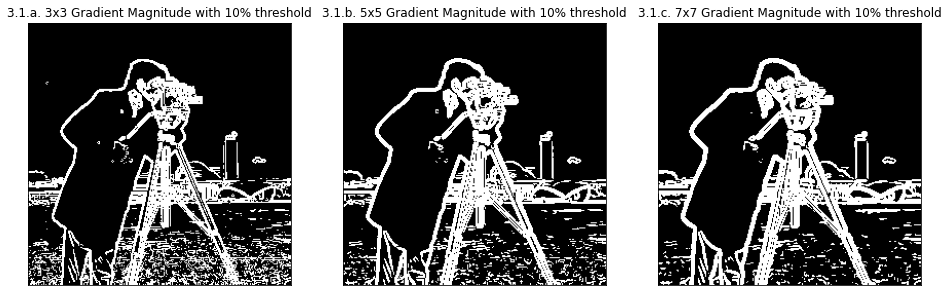

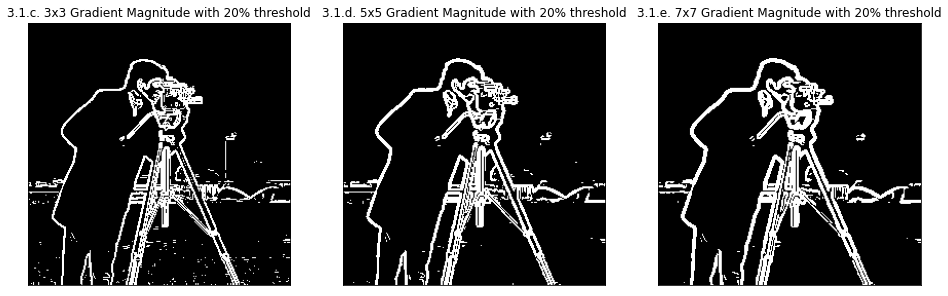

In [ ]:
clean_cam = cv2.imread(path+'cameraman.png', cv2.IMREAD_GRAYSCALE)

#Sobel Detectors
Ix_3x3 = cv2.Sobel(clean_cam, cv2.CV_64F, 1, 0, ksize=3)
Iy_3x3 = cv2.Sobel(clean_cam, cv2.CV_64F, 0, 1, ksize=3)
Ix_5x5 = cv2.Sobel(clean_cam, cv2.CV_64F, 1, 0, ksize=5)
Iy_5x5 = cv2.Sobel(clean_cam, cv2.CV_64F, 0, 1, ksize=5)
Ix_7x7 = cv2.Sobel(clean_cam, cv2.CV_64F, 1, 0, ksize=7)
Iy_7x7 = cv2.Sobel(clean_cam, cv2.CV_64F, 0, 1, ksize=7)

#Computing magnitude and phase for each sobel filter
Im_3x3 = cv2.magnitude(Ix_3x3, Iy_3x3)
Im_5x5 = cv2.magnitude(Ix_5x5, Iy_5x5)
Im_7x7 = cv2.magnitude(Ix_7x7, Iy_7x7)


def get_threshold(percent,arr):
  """
  Defines theshold for binary threshold: x% of max pixel brightness
  Parameters
  ----------
  percent : desired percent
  arr: img in which to compute max pixel brightness
  Returns
  -------
  Threshold
  """
  return (percent / 100) * np.max(arr)

#Defining threshold
m1THRESH_3x3, m1THRESH_5x5, m1THRESH_7x7 = get_threshold(10,Im_3x3), get_threshold(10,Im_5x5), get_threshold(10,Im_7x7)
m2THRESH_3x3, m2THRESH_5x5, m2THRESH_7x7 = get_threshold(20,Im_3x3), get_threshold(20,Im_5x5), get_threshold(20,Im_7x7)

#Initializing new images to black
m1thresh_3x3 = np.zeros_like(clean_cam)
m1thresh_5x5 = np.zeros_like(clean_cam)
m1thresh_7x7 = np.zeros_like(clean_cam)
m2thresh_3x3 = np.zeros_like(clean_cam)
m2thresh_5x5 = np.zeros_like(clean_cam)
m2thresh_7x7 = np.zeros_like(clean_cam)

#Thresholding by setting all pixels above a threshold to white. 
m1thresh_3x3[Im_3x3 > m1THRESH_3x3] = 255
m2thresh_3x3[Im_3x3 > m2THRESH_3x3] = 255

m1thresh_5x5[Im_5x5 > m1THRESH_5x5] = 255
m2thresh_5x5[Im_5x5 > m2THRESH_5x5] = 255

m1thresh_7x7[Im_7x7 > m1THRESH_7x7] = 255
m2thresh_7x7[Im_7x7 > m2THRESH_7x7] = 255

#Plotting results
fig = plt.figure(figsize= (16,20))
plt.subplot(131), plt.imshow(m1thresh_3x3, cmap='gray')
plt.title('3.1.a. 3x3 Gradient Magnitude with 10% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(m1thresh_5x5, cmap='gray')
plt.title('3.1.b. 5x5 Gradient Magnitude with 10% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(m1thresh_7x7, cmap='gray')
plt.title('3.1.c. 7x7 Gradient Magnitude with 10% threshold'), plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize= (16,20))
plt.subplot(131), plt.imshow(m2thresh_3x3, cmap='gray')
plt.title('3.1.c. 3x3 Gradient Magnitude with 20% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(m2thresh_5x5, cmap='gray')
plt.title('3.1.d. 5x5 Gradient Magnitude with 20% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(m2thresh_7x7, cmap='gray')
plt.title('3.1.e. 7x7 Gradient Magnitude with 20% threshold'), plt.xticks([]), plt.yticks([])
plt.show()


###3.2 Observations

The outputs above indicate that as filter size increase, the edges increase in width and are not as well defined. This is mostly likely because the lines on the image are very few pixels across. 

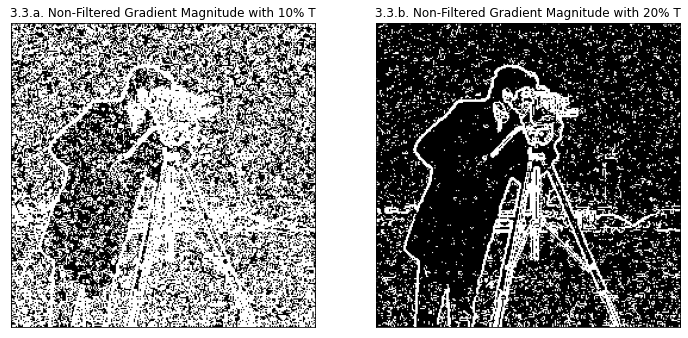

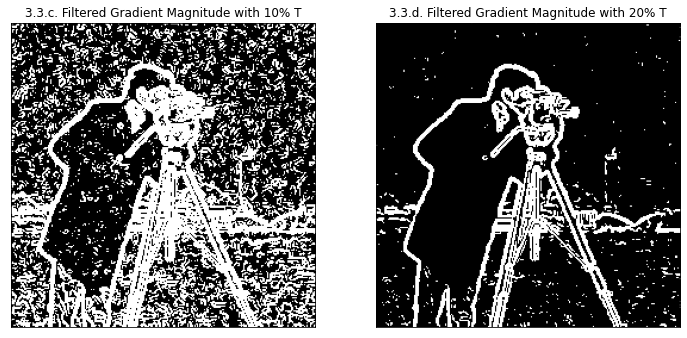

In [ ]:
def show_sobel_and_threshold(img, filtered):
  """
  Defines 3x3 sobel kernels, gradient magnitudes and phase, thresholds with
  10% and 20% max pixel value, and displays results. 
  Parameters: 
  ----------
  img : np.array (image)
  filtered : boolean (for plotting purposes)
  """
  #Defining Sobel kernel (partial derivatives)
  NIx_3x3 = cv2.Sobel(img, get_dtype(img), 1, 0, ksize=3)
  NIy_3x3 = cv2.Sobel(img, get_dtype(img), 0, 1, ksize=3)
  #Defining magnitude and phase of image gradient
  NIm_3x3 = cv2.magnitude(NIx_3x3, NIy_3x3)

  #Initialializing new images to black
  nm_1thresh = np.zeros_like(img)
  nm_2thresh = np.zeros_like(img)

  #Defining thresholds (x% of max pixel brightness)
  NI1_mTHRESH, NI2_mTHRESH = get_threshold(10,NIm_3x3), get_threshold(20,NIm_3x3)
  #Simple binary thresholding
  nm_1thresh[NIm_3x3 > NI1_mTHRESH] = 255
  nm_2thresh[NIm_3x3 > NI2_mTHRESH] = 255

  #Plotting results
  if (not filtered):
    filter_status = 'Non-'
    index = ('a','b')
  else: 
    filter_status = ''
    index = ('c','d')
  fig = plt.figure(figsize= (12,28))
  fig.add_subplot(4,2,1), plt.imshow(nm_1thresh, cmap='gray')
  plt.title('3.3.{}. {}Filtered Gradient Magnitude with 10% T'.format(index[0],filter_status)), plt.xticks([]), plt.yticks([])
  fig.add_subplot(4,2,2), plt.imshow(nm_2thresh, cmap='gray')
  plt.title('3.3.{}. {}Filtered Gradient Magnitude with 20% T'.format(index[1],filter_status)), plt.xticks([]), plt.yticks([])
  plt.show()

#Loading image
noisy_cam = plt.imread(path + 'gaussian_cameraman.png')
#Applying convolution with box kernel
box_kernel_3x3 = np.ones((3,3))/9
denoisy_cam = cv2.filter2D(noisy_cam, get_dtype(noisy_cam), box_kernel_3x3)


#Compare edge detection before and after de-noising
show_sobel_and_threshold(noisy_cam, filtered = False)
show_sobel_and_threshold(denoisy_cam, filtered = True)




###3.5 Observations
As evidenced by the outputs above, denoising an image corrupted with Gaussian noise prior to detecting edges removes many unwanted features and outlines the cameraman more clearly.This is diplayed most clearly with the 20% threshold which additionally removes the low amplitude noise present in the 10% threshold case. 

#4 Canny Edge Detection

###1.1 Steps of Canny Edge Detection
1. Apply a sobel filter or derivative kernel to the image to find the partial derivatives in the x and y directions. 
2. Using the partial derivatives, compute the gradient magnitude and phase. 
3. Apply non-maximum suppression to thin down multi pixel edges to one pixel wide edges. 
4. Perform hysterisis thresholding 


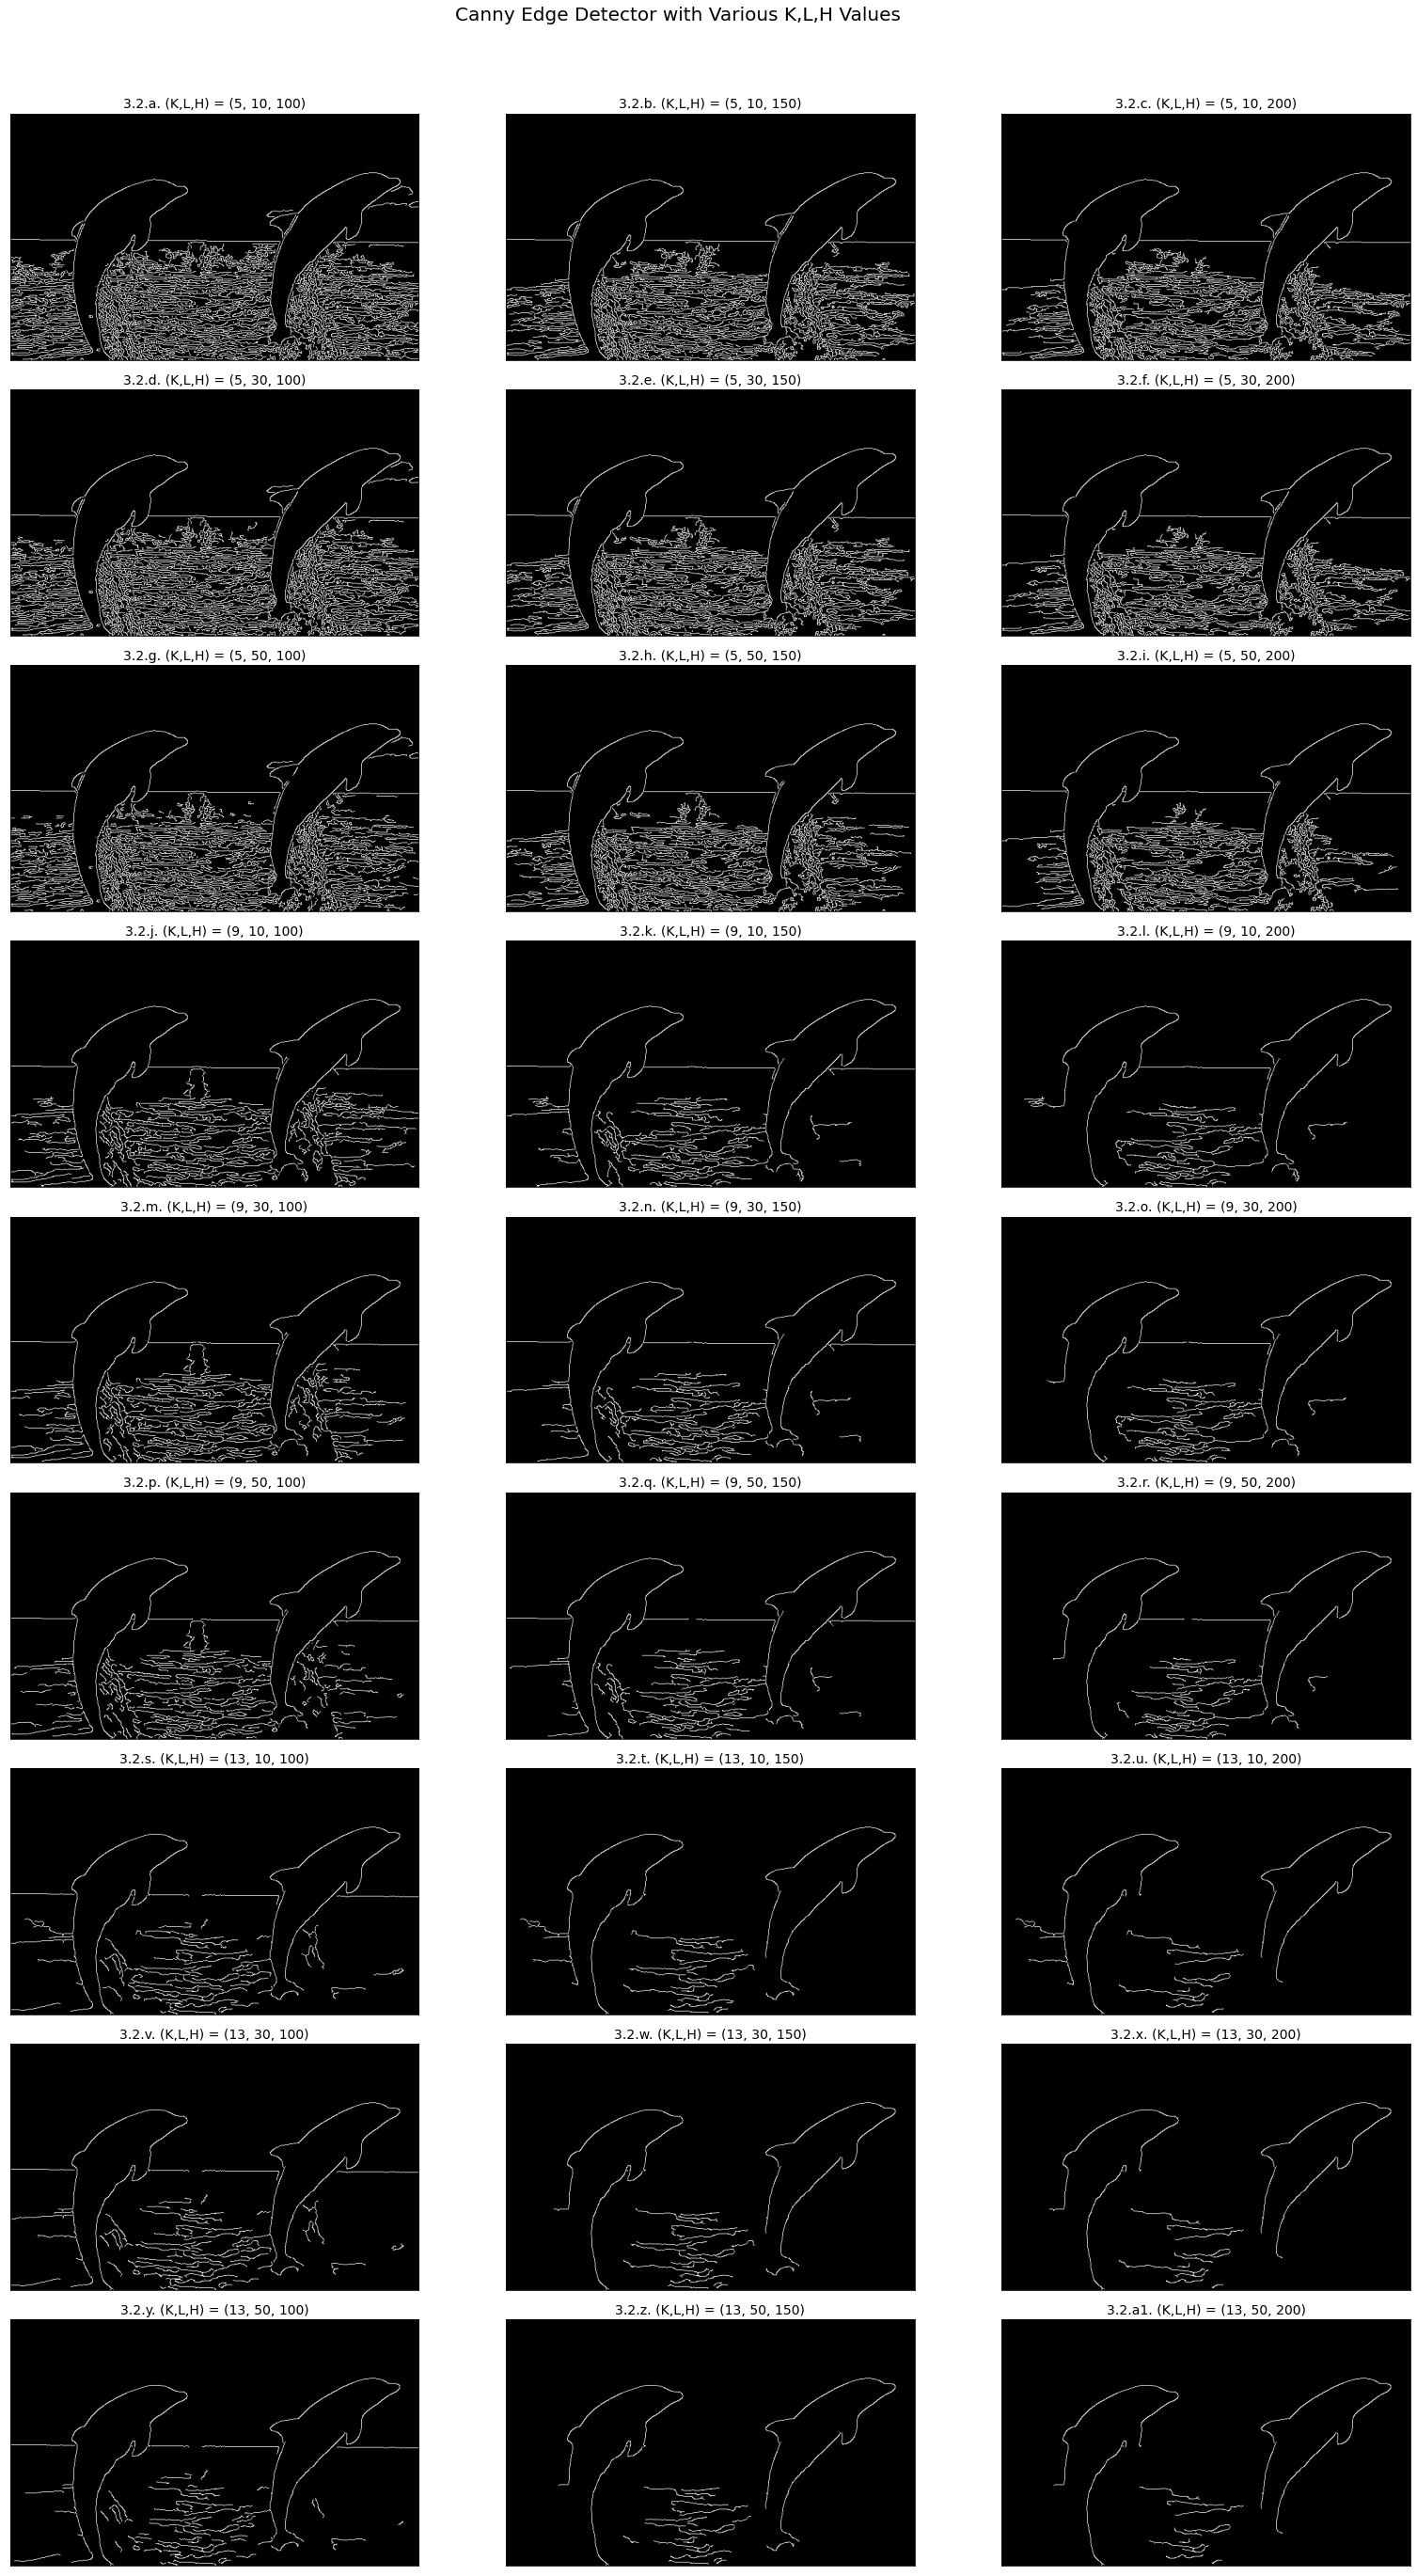

In [ ]:
import string

def canny_edge(img, k, l, h):
  """
  Applies a Gaussian Filter and then detects the Canny Edges
  Parameters:
  ----------
  img : np.array
  k : dimensions of Gaussian kernel
  l : low treshold for hysterisis
  h : high threshold for hysterisis
  Returns
  -------
  img: np.array after Gaussian filtering and canny edge detection
  """
  img = cv2.GaussianBlur(img,(k,k),0)
  img = cv2.Canny(img, l, h)
  return img

def show_plots(problem, numx, numy, images):
  """
  Displays plots
  Parameters:
  ----------
  problem : string (problem number)
  numx : number of rows of images
  numy : number of columns of images
  images : dictionary containing images and associated parameters
  """
  fig = plt.figure(figsize= (32,40))
  plt.suptitle('Canny Edge Detector with Various K,L,H Values',fontsize=20, x =0.4)
  #Plot image for each k,l,h triple
  for i in range(27):
    fig.add_subplot(9,3,i+1)
    plt.imshow(img_info['images'][i], cmap='gray')
    if i == 26: 
      ind = 'a1'
    else: 
      ind = list(string.ascii_lowercase)[i]
    plt.title('{}.{}. (K,L,H) = {}'.format(problem,ind, img_info['params'][i]), fontsize=14)
    plt.xticks([]), plt.yticks([])
  fig.tight_layout(rect=[0.03, 0.03, 0.8, 0.95])
  plt.show()

#Load imagge and convert to grayscale
dolphin = plt.imread(path+'dolphin.jpg')
dolphin = cv2.cvtColor(dolphin, cv2.COLOR_RGB2GRAY, get_dtype(dolphin))
 #Define each parameter
K,L,H = (5,9,13),(10,30,50),(100,150,200)
#Initialize dictionary of images and associated parameters
img_info = {'images' : [], 'params': []}
#For every k,l,h triple, add image and associated parameters to dictionary
for k in K: 
  for l in L: 
     for h in H:
       img_info['images'].append(canny_edge(dolphin, k, l, h))
       img_info['params'].append((k,l,h))
show_plots(3.2,9,3, img_info)





###4.3 Observations
Naturally, as we increase kernel size the image becomes more blurry, although it is difficult to notice blurr in the simple output images. Nevertheless, many features get increasingly blurred into the background, and appear more as a slow gradient than a sharp detectable edge. 

As we increase the low threshold, many of the weaker edges disapear and the image becomes more crisp with complete contours. As the high threshold is increased, fewer strong lines are present, such as the ripples in the water, but the ones that remain are strongest, such as the outlines of the dolphins. 

K does not appear to relate to H or L. However, H and L appear to relate to each other. Once H is sufficiently high or low, then changing L does not impact the image much. 



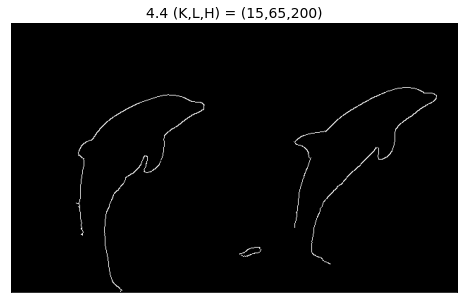

In [ ]:
K = 15
L = 65
H = 200

fig = plt.figure(figsize= (8,10))
plt.subplot(111), plt.imshow(canny_edge(dolphin, K,L, H), cmap='gray')
plt.title('4.4 (K,L,H) = ({},{},{})'.format(K, L, H), fontsize=14)
plt.xticks([]), plt.yticks([])
plt.show()

###4.4 Hyperparameters for Dolphin Edges
By trial and error, the triple (15, 65, 200 ) displays only dolphin edges as shown above. 

#5 Harris Corner Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 772)


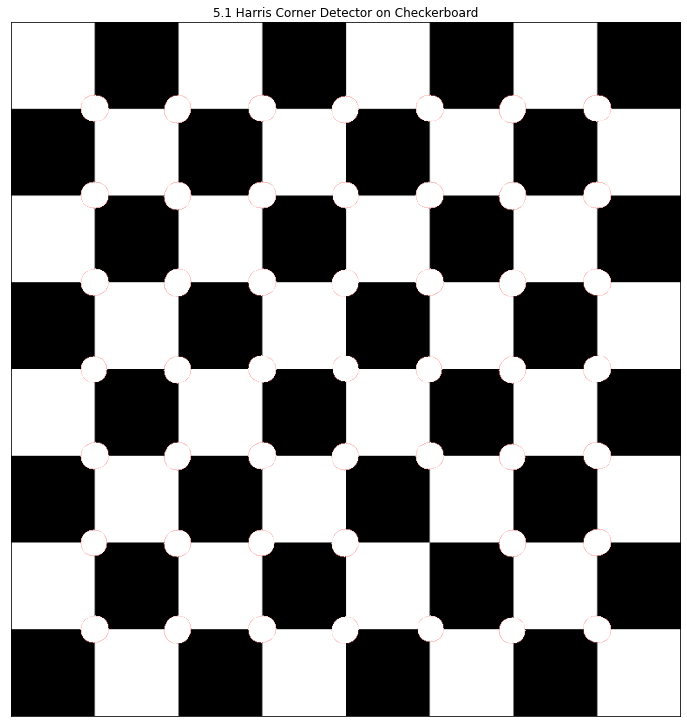

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(254, 253)


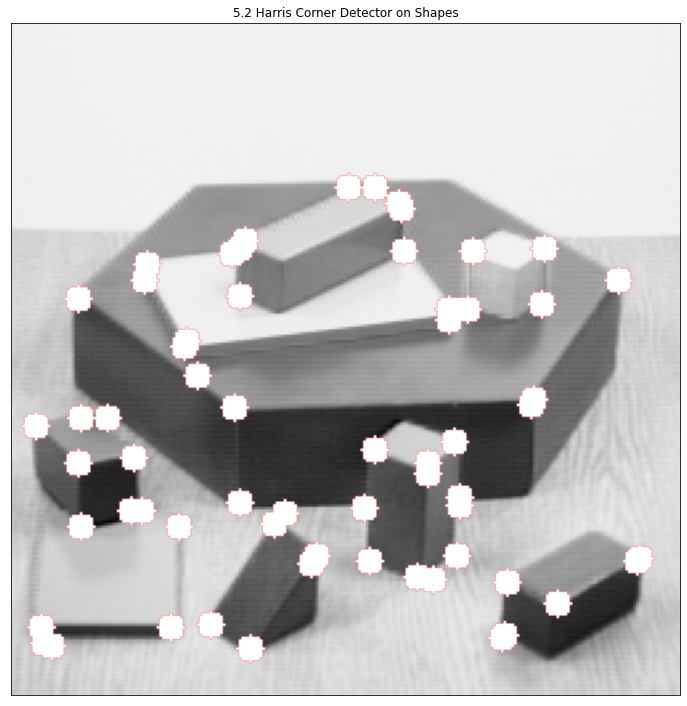

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128)


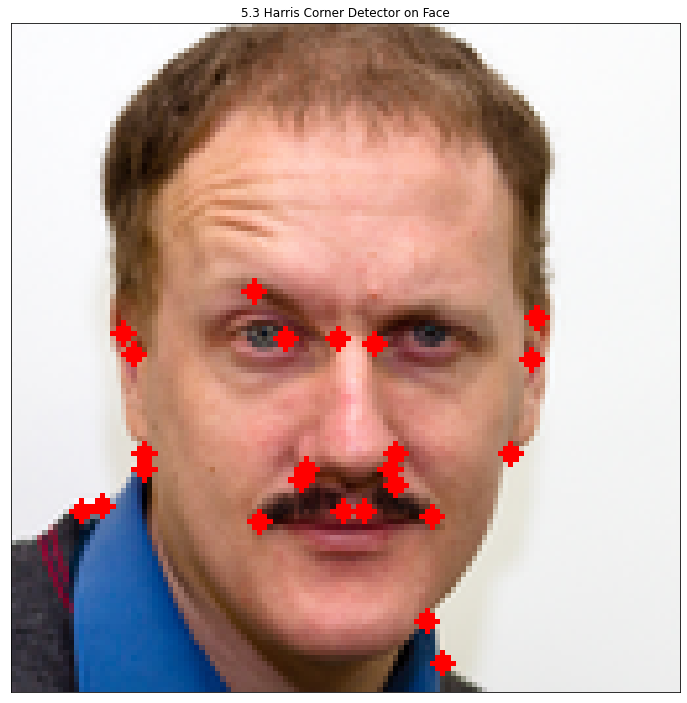

In [ ]:
def gaussian_blur(img, size, sigma =1):  
  """
  Applies a Gaussian Filter to image
  Parameters
  ----------
  img : np.array (image)
  size : dimensions of Gaussian kernel
  sigma : Gaussian sigma value, default = 1
  Returns
  -------
  img: np.array after Gaussian filtering
  """  
  size = int(size) // 2
  x, y = np.mgrid[-size:size+1, -size:size+1]
  normal = 1 / (2.0 * np.pi * sigma**2)
  g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
  img_gauss = cv2.filter2D(img, get_dtype(img), g)
  return img_gauss

def partial_derivatives(img):
  """
  Computes partial derivatives using Sobel Kernels
  ----------
  img : np.array (image)
  Returns
  -------
  (Ixx, Iyy, Ixy, Iyx): Tuple of partial derivatives
  """ 
  #Computing partial derivatives with convolution with Sobel filters
  Kx = np.array([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]], np.dtype(img.dtype))
  Ky = np.array([[1, 2, 1],
                 [0, 0, 0],
                 [-1, -2, -1]], np.dtype(img.dtype))
  Ix = cv2.filter2D(img, get_dtype(img), Kx)
  Iy = cv2.filter2D(img, get_dtype(img), Ky)
  #Computing second partial derivatives
  Ixy = Ix * Iy
  Iyx = Iy * Ix
  Ixx = Ix * Ix
  Iyy = Iy * Iy
  return (Ixx, Iyy, Ixy, Iyx)

def cornerness_function(hessian, alpha):
  """
  Computes Cornerness with Gaussian blurred second partial derivatives
  Parameters:
  ----------
  H : tuple of second partial derivatives
  k : constant (default = 0.05)
  Returns:
  ------
  Cornerness response matrix
  """ 
  #Blurring all the second partials
  gIxx = gaussian_blur(hessian[0], 3, 1)
  gIyy = gaussian_blur(hessian[1], 3, 1)
  gIxy = gaussian_blur(hessian[2], 3, 1)
  gIyx = gaussian_blur(hessian[3], 3, 1)
  #Computing cornerness response
  r = (gIxx*gIyy - gIxy*gIyx) - alpha*((gIxx + gIyy)**2)
  return r


def non_maximum_suppression(r):
  """
  Perfoms non maximum supression to reduce the size of corners to 1 pixel. 
  Parameters:
  ----------
  r : cornerness response
  Returns:
  ------
  z : image with single pixel corners
  """ 
  arr = r.copy()
  M,N = arr.shape
  z = np.zeros((M,N))

  for i in range(1,M-1): # Note that we are leaving 1 pixel gap on each side of image
    for j in range(1,N-1): 
      # Defining neighbourhood   
      window = np.array([[r[i+1,j-1],r[i+1,j],r[i+1,j+1]],
                        [r[i,j-1],r[i,j],r[i,j+1]],
                        [r[i-1,j-1],r[i-1,j],r[i-1,j-1]]])
      greater_than_neighbours = (r[i,j] > window[0,0]) and (r[i,j] > window[0,1]) and (r[i,j] > window[0,2] and (r[i,j] > window[1,0]) and (r[i,j] > window[1,2]) and (r[i,j] > window[2,0]) and (r[i,j] > window[2,1]) and (r[i,j] > window[2,2]))
      if greater_than_neighbours:
        #If pixel is greater than its neighbours, keep it
        z[i,j] = r[i,j] 
      # otherwise make its value to 0
      elif not greater_than_neighbours:
        z[i,j] = 0
  print(r.shape)
  return z
  

def harris_corners(img,title,THRESHOLD, circ_size):
  """
  Computes the harris corners using the steps described in the notes
  and displays the locations on the original image. 
  ----------
  img : image on which to detect corners. 
  title : title of plot
  THRESHOLD : threshold for corner detection
  circ_size : size of circles to plot on corners. 
  """ 
  original = img.copy()
  #Blurring the image
  img = gaussian_blur(img, 3, 1)
  #Converting to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY, get_dtype(img))
  #Computing the second partial derivatives of the image
  der = partial_derivatives(img)
  #Computing the cornerness response from these partials
  r = cornerness_function(der,0.05)
  #Performing non maximum suppression on the cornerness response
  nm = non_maximum_suppression(r)
  #Normalizing corners with the min and the max at 0 and 2. 
  cv2.normalize(nm, nm, 0, 2, cv2.NORM_MINMAX)
  #Determining locations of corners above a threshold
  loc = np.where(nm >= THRESHOLD)
  #Plotting circles on these corners
  for pt in zip(*loc[::-1]):
    cv2.circle(original, pt, circ_size,(250,0,0), -1)
  #Displaying the original image with circles on corners. 
  fig = plt.figure(figsize=(12,16))
  plt.subplot(111), plt.imshow(original, cmap='gray')
  plt.title('{}'.format(title)), plt.xticks([]), plt.yticks([])
  plt.show()


checkerboard = plt.imread(path+'checkerboard.png')  
harris_corners(checkerboard, '5.1 Harris Corner Detector on Checkerboard', THRESHOLD = 1, circ_size = 15)

shapes = plt.imread(path+'shapes.png')
harris_corners(shapes, '5.2 Harris Corner Detector on Shapes', THRESHOLD = 0.05, circ_size = 5)


face = plt.imread(path+'00048.png')
harris_corners(face, '5.3 Harris Corner Detector on Face', THRESHOLD = 0.05, circ_size = 2)




###5 Observations
As we decrease the threshold to just above 0, there is little impact on corner detection. Likewise, if we increase above 1.65, we start to lose edges around the boundary. If we set the threshold to 0, all points on the image are detected as corners. If we set the threshold to 2, we detect only the center corner. A threshold of 1 was most effective.

In the case of the shapes image and the face, the lower the threshold, the more corners are detected, though not every corner remains detected. However, if we decrease the threshold too much, the too many points are considered corners and no information can be gathered. Detecting corners required a much smaller threshold than in the checkerboard case. A threshold of 0.05 was most effective. 